# Regression Model on Merged Dataset

In [1]:
# all imports
import pandas as pd
import os
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from math import sqrt
import statsmodels.formula.api as smf
import statsmodels.stats as stats

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import statsmodels.api as sm

In [2]:
cwdir = os.getcwd()
air = pd.read_csv(cwdir + "\\Final Airfar Data for Midterm.csv")

In [3]:
car = pd.read_csv(cwdir + "\\Final Car Rental Data for Midterm.csv")
#car = pd.read_csv(cwdir + "\\car_withLOR.csv")

In [4]:
air.head()

,TO_AIRPORT,CXR,FROM_AIRPORT,EXTRACT(WEEK FROM DDATE),DAYOFWEEK(DDATE),AVG(FARE),MIN(FARE),MAX(FARE),MEDIAN(FARE),STDDEV(FARE),NO_RECORDS,DISTANCE
0,ADQ,AS,ANC,1,0,213.25,109.0,362.0,191.0,101.647500,8,252
1,ADQ,AS,ANC,1,2,300.25,170.0,462.0,313.5,109.914947,12,252
2,ADQ,AS,ANC,1,3,262.00,158.0,462.0,170.0,141.506184,5,252
3,ADQ,AS,ANC,1,4,252.00,126.0,362.0,260.0,118.215300,8,252
4,ADQ,AS,ANC,1,5,294.00,126.0,462.0,362.0,136.782065,10,252


In [5]:
car.head()

,LOCATION,AGENCY,WEEK_NO,DAYOFWEEK(PDATE),AVG(DAILY_FARE),MIN(DAILY_FARE),MAX(DAILY_FARE),MEDIAN(DAILY_FARE),STDDEV(DAILY_FARE),NO_RECORDS
0,ATL,AL,1,0,93.353722,24.381111,312.625000,67.130000,71.531940,78400
1,ATL,AL,1,1,59.638688,27.835000,374.153333,50.360000,30.452213,71066
2,ATL,AL,1,2,73.917574,27.563750,331.078000,55.442500,52.936221,133251
3,ATL,AL,1,3,90.808573,24.730000,374.152500,67.130000,65.922274,68905
4,ATL,AL,1,4,87.506949,22.935000,331.078000,61.583333,69.476999,80541


In [6]:
air_lax = air[air["TO_AIRPORT"] == "LAX"]
air_lax.head()

,TO_AIRPORT,CXR,FROM_AIRPORT,EXTRACT(WEEK FROM DDATE),DAYOFWEEK(DDATE),AVG(FARE),MIN(FARE),MAX(FARE),MEDIAN(FARE),STDDEV(FARE),NO_RECORDS,DISTANCE
150853,LAX,AS,JFK,1,0,278.100000,243.0,429.0,243.0,66.108413,10,2469
150854,LAX,AS,JFK,1,2,465.266667,392.0,697.0,472.0,72.132286,15,2469
150855,LAX,AS,JFK,1,3,454.200000,367.0,697.0,392.0,120.372385,10,2469
150856,LAX,AS,JFK,1,4,326.000000,209.0,429.0,319.0,73.025110,10,2469
150857,LAX,AS,JFK,1,5,282.600000,209.0,392.0,284.0,49.279701,10,2469


In [7]:
car_lax = car[car["LOCATION"] == "LAX"]
car_lax.head()

,LOCATION,AGENCY,WEEK_NO,DAYOFWEEK(PDATE),AVG(DAILY_FARE),MIN(DAILY_FARE),MAX(DAILY_FARE),MEDIAN(DAILY_FARE),STDDEV(DAILY_FARE),NO_RECORDS
37492,LAX,AL,1,0,82.560914,20.521111,342.405,79.508889,38.522142,72234
37493,LAX,AL,1,1,96.456232,18.777778,387.985,78.147143,66.674856,77938
37494,LAX,AL,1,2,86.273949,18.763333,445.770,74.756250,55.998409,134299
37495,LAX,AL,1,3,76.206989,20.285714,386.485,71.906000,40.032859,59548
37496,LAX,AL,1,4,74.711984,20.285714,279.078,66.072500,38.925767,69829


In [8]:
merged = pd.merge(car_lax, air_lax,  how='left', left_on=['WEEK_NO','DAYOFWEEK(PDATE)'], right_on = ['EXTRACT(WEEK FROM DDATE)','DAYOFWEEK(DDATE)'])

In [9]:
merged

,LOCATION,AGENCY,WEEK_NO,DAYOFWEEK(PDATE),AVG(DAILY_FARE),MIN(DAILY_FARE),MAX(DAILY_FARE),MEDIAN(DAILY_FARE),STDDEV(DAILY_FARE),NO_RECORDS_x,...,FROM_AIRPORT,EXTRACT(WEEK FROM DDATE),DAYOFWEEK(DDATE),AVG(FARE),MIN(FARE),MAX(FARE),MEDIAN(FARE),STDDEV(FARE),NO_RECORDS_y,DISTANCE
0,LAX,AL,1,0,82.560914,20.521111,342.405,79.508889,38.522142,72234,...,JFK,1,0,278.100000,243.0,429.0,243.0,66.108413,10,2469
1,LAX,AL,1,0,82.560914,20.521111,342.405,79.508889,38.522142,72234,...,OGG,1,0,619.000000,589.0,649.0,619.0,42.426407,2,2483
2,LAX,AL,1,0,82.560914,20.521111,342.405,79.508889,38.522142,72234,...,ORD,1,0,245.500000,178.0,313.0,245.5,95.459415,2,1741
3,LAX,AL,1,0,82.560914,20.521111,342.405,79.508889,38.522142,72234,...,PDX,1,0,94.000000,69.0,119.0,99.0,15.063966,14,835
4,LAX,AL,1,0,82.560914,20.521111,342.405,79.508889,38.522142,72234,...,SEA,1,0,251.229167,89.0,599.0,219.5,152.098266,48,955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163411,LAX,ZT,52,6,136.815870,32.954000,499.554,119.346667,67.284216,45140,...,RNO,52,6,250.273585,118.0,330.0,251.0,46.599108,106,391
163412,LAX,ZT,52,6,136.815870,32.954000,499.554,119.346667,67.284216,45140,...,SAN,52,6,321.342105,99.0,1179.0,354.0,137.044159,266,109
163413,LAX,ZT,52,6,136.815870,32.954000,499.554,119.346667,67.284216,45140,...,SEA,52,6,342.365672,144.0,414.0,331.0,76.980277,134,955
163414,LAX,ZT,52,6,136.815870,32.954000,499.554,119.346667,67.284216,45140,...,SFO,52,6,246.613592,49.0,1254.0,235.0,160.607917,515,338


In [10]:
merged.to_csv("Merged Data.csv")

In [11]:
# run from here next time

In [12]:
merged = pd.read_csv("Merged Data.csv")

In [13]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163416 entries, 0 to 163415
Data columns (total 23 columns):
Unnamed: 0                  163416 non-null int64
LOCATION                    163416 non-null object
AGENCY                      163416 non-null object
WEEK_NO                     163416 non-null int64
DAYOFWEEK(PDATE)            163416 non-null int64
AVG(DAILY_FARE)             163416 non-null float64
MIN(DAILY_FARE)             163416 non-null float64
MAX(DAILY_FARE)             163416 non-null float64
MEDIAN(DAILY_FARE)          163416 non-null float64
STDDEV(DAILY_FARE)          163416 non-null float64
NO_RECORDS_x                163416 non-null int64
TO_AIRPORT                  163416 non-null object
CXR                         163416 non-null object
FROM_AIRPORT                163416 non-null object
EXTRACT(WEEK FROM DDATE)    163416 non-null int64
DAYOFWEEK(DDATE)            163416 non-null int64
AVG(FARE)                   163416 non-null float64
MIN(FARE)             

In [14]:
merged.head()

,Unnamed: 0,LOCATION,AGENCY,WEEK_NO,DAYOFWEEK(PDATE),AVG(DAILY_FARE),MIN(DAILY_FARE),MAX(DAILY_FARE),MEDIAN(DAILY_FARE),STDDEV(DAILY_FARE),...,FROM_AIRPORT,EXTRACT(WEEK FROM DDATE),DAYOFWEEK(DDATE),AVG(FARE),MIN(FARE),MAX(FARE),MEDIAN(FARE),STDDEV(FARE),NO_RECORDS_y,DISTANCE
0,0,LAX,AL,1,0,82.560914,20.521111,342.405,79.508889,38.522142,...,JFK,1,0,278.100000,243.0,429.0,243.0,66.108413,10,2469
1,1,LAX,AL,1,0,82.560914,20.521111,342.405,79.508889,38.522142,...,OGG,1,0,619.000000,589.0,649.0,619.0,42.426407,2,2483
2,2,LAX,AL,1,0,82.560914,20.521111,342.405,79.508889,38.522142,...,ORD,1,0,245.500000,178.0,313.0,245.5,95.459415,2,1741
3,3,LAX,AL,1,0,82.560914,20.521111,342.405,79.508889,38.522142,...,PDX,1,0,94.000000,69.0,119.0,99.0,15.063966,14,835
4,4,LAX,AL,1,0,82.560914,20.521111,342.405,79.508889,38.522142,...,SEA,1,0,251.229167,89.0,599.0,219.5,152.098266,48,955


In [15]:
weekdays = [1,2,3,4]
merged["weekend"] = np.where(merged.iloc[:,4].isin(weekdays) == True, 0, 1)

In [16]:
merged_reg = merged.copy()

#Dropped FROM_AIRPORT , DISTANCE , CXR
#Added No_records_y ,  AVG(FARE) into regression --this will include Airfare as a feature for Care Fare prediction
drop_columns = ["FROM_AIRPORT", "DISTANCE", "CXR","DAYOFWEEK(PDATE)","Unnamed: 0", "LOCATION", "MIN(DAILY_FARE)", "MAX(DAILY_FARE)", "MEDIAN(DAILY_FARE)","STDDEV(DAILY_FARE)","TO_AIRPORT", "EXTRACT(WEEK FROM DDATE)", "DAYOFWEEK(DDATE)", "MIN(FARE)","MAX(FARE)", "MEDIAN(FARE)", "STDDEV(FARE)"]
merged_reg.drop(columns = drop_columns , axis=1, inplace = True)


"""
#Group by everything except Label column
merged_regression_group = merged_reg.groupby(list(merged_regression.columns[:-1]) , as_index=False)
merged_regression_group.aggregate(np.mean)

merged_regression = pd.DataFrame(merged_regression_group)"""
merged_regression = pd.get_dummies(merged_reg,columns=['AGENCY' , "WEEK_NO"], drop_first=True)
merged_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163416 entries, 0 to 163415
Data columns (total 63 columns):
AVG(DAILY_FARE)    163416 non-null float64
NO_RECORDS_x       163416 non-null int64
AVG(FARE)          163416 non-null float64
NO_RECORDS_y       163416 non-null int64
weekend            163416 non-null int32
AGENCY_ET          163416 non-null uint8
AGENCY_ZD          163416 non-null uint8
AGENCY_ZE          163416 non-null uint8
AGENCY_ZI          163416 non-null uint8
AGENCY_ZL          163416 non-null uint8
AGENCY_ZR          163416 non-null uint8
AGENCY_ZT          163416 non-null uint8
WEEK_NO_2          163416 non-null uint8
WEEK_NO_3          163416 non-null uint8
WEEK_NO_4          163416 non-null uint8
WEEK_NO_5          163416 non-null uint8
WEEK_NO_6          163416 non-null uint8
WEEK_NO_7          163416 non-null uint8
WEEK_NO_8          163416 non-null uint8
WEEK_NO_9          163416 non-null uint8
WEEK_NO_10         163416 non-null uint8
WEEK_NO_11         16341

In [17]:
#Rearranging columns
merged_regression = merged_regression[[col for col in merged_regression.columns if col not in ['AVG(DAILY_FARE)']] + [ 'AVG(DAILY_FARE)']]


#Removing paranthesis from the column names
regression_columns = [ col.replace('(' , '_').replace(')' , '') for col in merged_regression.columns ]
merged_regression.columns = regression_columns

merged_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163416 entries, 0 to 163415
Data columns (total 63 columns):
NO_RECORDS_x      163416 non-null int64
AVG_FARE          163416 non-null float64
NO_RECORDS_y      163416 non-null int64
weekend           163416 non-null int32
AGENCY_ET         163416 non-null uint8
AGENCY_ZD         163416 non-null uint8
AGENCY_ZE         163416 non-null uint8
AGENCY_ZI         163416 non-null uint8
AGENCY_ZL         163416 non-null uint8
AGENCY_ZR         163416 non-null uint8
AGENCY_ZT         163416 non-null uint8
WEEK_NO_2         163416 non-null uint8
WEEK_NO_3         163416 non-null uint8
WEEK_NO_4         163416 non-null uint8
WEEK_NO_5         163416 non-null uint8
WEEK_NO_6         163416 non-null uint8
WEEK_NO_7         163416 non-null uint8
WEEK_NO_8         163416 non-null uint8
WEEK_NO_9         163416 non-null uint8
WEEK_NO_10        163416 non-null uint8
WEEK_NO_11        163416 non-null uint8
WEEK_NO_12        163416 non-null uint8
WEEK_NO

In [18]:
#X = merged_regression.iloc[: , :-1]
#print("X" , X.shape)
#y = merged_regression.iloc[:, -1]
#print("y" , y.shape)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
merged_regression.shape

(163416, 63)

In [20]:
def decode(datum):
    #print(datum)
    value = np.argmax(datum)
    #print("value",value)
    value = int(value[8:])
    #print("int value",value)
    
    if value == 2:
        #print("datum",int(datum[0]))
        if(int(datum[0]))==0:
            value=1
        else:
            value=2         
    
    return value

#a = [0,0,0,0]
#decode(a)
#decode(merged_regression.iloc[5000 , 11:-1])

In [21]:
decode(merged_regression.iloc[5000 , 11:-1])

E:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


12

In [22]:
import statsmodels.formula.api as smf
import statsmodels.stats as stats

In [23]:
x_features = regression_columns[0]
for xm in regression_columns[1:-1]:
    x_features = x_features+'+'+xm
x_features

'NO_RECORDS_x+AVG_FARE+NO_RECORDS_y+weekend+AGENCY_ET+AGENCY_ZD+AGENCY_ZE+AGENCY_ZI+AGENCY_ZL+AGENCY_ZR+AGENCY_ZT+WEEK_NO_2+WEEK_NO_3+WEEK_NO_4+WEEK_NO_5+WEEK_NO_6+WEEK_NO_7+WEEK_NO_8+WEEK_NO_9+WEEK_NO_10+WEEK_NO_11+WEEK_NO_12+WEEK_NO_13+WEEK_NO_14+WEEK_NO_15+WEEK_NO_16+WEEK_NO_17+WEEK_NO_18+WEEK_NO_19+WEEK_NO_20+WEEK_NO_21+WEEK_NO_22+WEEK_NO_23+WEEK_NO_24+WEEK_NO_25+WEEK_NO_26+WEEK_NO_27+WEEK_NO_28+WEEK_NO_29+WEEK_NO_30+WEEK_NO_31+WEEK_NO_32+WEEK_NO_33+WEEK_NO_34+WEEK_NO_35+WEEK_NO_36+WEEK_NO_37+WEEK_NO_38+WEEK_NO_39+WEEK_NO_40+WEEK_NO_41+WEEK_NO_42+WEEK_NO_43+WEEK_NO_44+WEEK_NO_45+WEEK_NO_46+WEEK_NO_47+WEEK_NO_48+WEEK_NO_49+WEEK_NO_50+WEEK_NO_51+WEEK_NO_52'

In [24]:
regression_columns[-1] + "~"+ x_features

'AVG_DAILY_FARE~NO_RECORDS_x+AVG_FARE+NO_RECORDS_y+weekend+AGENCY_ET+AGENCY_ZD+AGENCY_ZE+AGENCY_ZI+AGENCY_ZL+AGENCY_ZR+AGENCY_ZT+WEEK_NO_2+WEEK_NO_3+WEEK_NO_4+WEEK_NO_5+WEEK_NO_6+WEEK_NO_7+WEEK_NO_8+WEEK_NO_9+WEEK_NO_10+WEEK_NO_11+WEEK_NO_12+WEEK_NO_13+WEEK_NO_14+WEEK_NO_15+WEEK_NO_16+WEEK_NO_17+WEEK_NO_18+WEEK_NO_19+WEEK_NO_20+WEEK_NO_21+WEEK_NO_22+WEEK_NO_23+WEEK_NO_24+WEEK_NO_25+WEEK_NO_26+WEEK_NO_27+WEEK_NO_28+WEEK_NO_29+WEEK_NO_30+WEEK_NO_31+WEEK_NO_32+WEEK_NO_33+WEEK_NO_34+WEEK_NO_35+WEEK_NO_36+WEEK_NO_37+WEEK_NO_38+WEEK_NO_39+WEEK_NO_40+WEEK_NO_41+WEEK_NO_42+WEEK_NO_43+WEEK_NO_44+WEEK_NO_45+WEEK_NO_46+WEEK_NO_47+WEEK_NO_48+WEEK_NO_49+WEEK_NO_50+WEEK_NO_51+WEEK_NO_52'

In [25]:
merged_regression.shape

(163416, 63)

In [26]:
reg_ols = smf.ols(formula= regression_columns[-1] + "~"+ x_features  , data = merged_regression ).fit()

In [27]:
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         AVG_DAILY_FARE   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 1.642e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:32:54   Log-Likelihood:            -5.5882e+05
No. Observations:              163416   AIC:                         1.118e+06
Df Residuals:                  163353   BIC:                         1.118e+06
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       71.8540      0.245    292.756      0.000      71.373      72.335
NO_RECORDS_x   7.95e-05   2.59e-06     30.735      0.000    7.44e-05    8.46e-05
AVG_FARE        -0.0001   4.14e-05     -3.338      0.001      -0.000    -5.7e-05
NO_RECORDS_y  2.123e-05   7.69e-05      0.276      0.782      -0.000       0.000
weekend          0.1814      0.040      4.586      0.000       0.104       0.259
AGENCY_ET        9.4413      0.073    129.017      0.000       9.298       9.585
AGENCY_ZD       13.5052      0.080    169.620      0.000      13.349      13.661
AGENCY_ZE        1.2242      0.110     11.118      0.000       1.008       1.440
AGENCY_ZI       26.7393      0.078    344.946      0.000      26.587      26.891
AGENCY_ZL       22.5971      0.077    292.766      0.000      22.446      22.748
AGENCY_ZR       -7.8440      0.102    -77.237      0.000      -8.043      -7.645
AGENCY_ZT       -8.3905      0.100    -83.510      0.000      -8.587      -8.194
WEEK_NO_2      -11.3810      0.180    -63.158      0.000     -11.734     -11.028
WEEK_NO_3       -0.2860      0.183     -1.559      0.119      -0.645       0.073
WEEK_NO_4        0.8955      0.187      4.790      0.000       0.529       1.262
WEEK_NO_5        3.3367      0.189     17.649      0.000       2.966       3.707
WEEK_NO_6        8.8097      0.187     47.130      0.000       8.443       9.176
WEEK_NO_7       12.0975      0.185     65.437      0.000      11.735      12.460
WEEK_NO_8        3.5078      0.184     19.062      0.000       3.147       3.869
WEEK_NO_9        2.0027      0.184     10.888      0.000       1.642       2.363
WEEK_NO_10       8.7558      0.182     48.064      0.000       8.399       9.113
WEEK_NO_11      10.3812      0.183     56.755      0.000      10.023      10.740
WEEK_NO_12      10.7578      0.185     58.260      0.000      10.396      11.120
WEEK_NO_13       7.8804      0.185     42.622      0.000       7.518       8.243
WEEK_NO_14       6.3934      0.185     34.615      0.000       6.031       6.755
WEEK_NO_15      14.8185      0.186     79.834      0.000      14.455      15.182
WEEK_NO_16      17.1221      0.184     93.147      0.000      16.762      17.482
WEEK_NO_17      -0.0284      0.184     -0.154      0.878      -0.390       0.333
WEEK_NO_18       2.5793      0.183     14.060      0.000       2.220       2.939
WEEK_NO_19       4.0087      0.183     21.895      0.000       3.650       4.368
WEEK_NO_20       4.0725      0.183     22.194      0.000       3.713       4.432
WEEK_NO_21       5.8531      0.184     31.864      0.000       5.493       6.213
WEEK_NO_22      -0.5084      0.183     -2.775      0.006      -0.868      -0.149
WEEK_NO_23       6.3514      0.183     34.662      0.000       5.992       6.711
WEEK_NO_24       6.8185      0.183     37.245      0.000       6.460       7.177
WEEK_

In [91]:
result_param = abs(reg_ols.params)
result_param.sort_values()

NO_RECORDS_y     0.000021
NO_RECORDS_x     0.000080
AVG_FARE         0.000138
WEEK_NO_45       0.002509
WEEK_NO_43       0.003940
                  ...    
WEEK_NO_28      36.481536
WEEK_NO_30      39.991380
WEEK_NO_29      40.743735
WEEK_NO_52      60.107259
Intercept       71.853997
Length: 63, dtype: float64

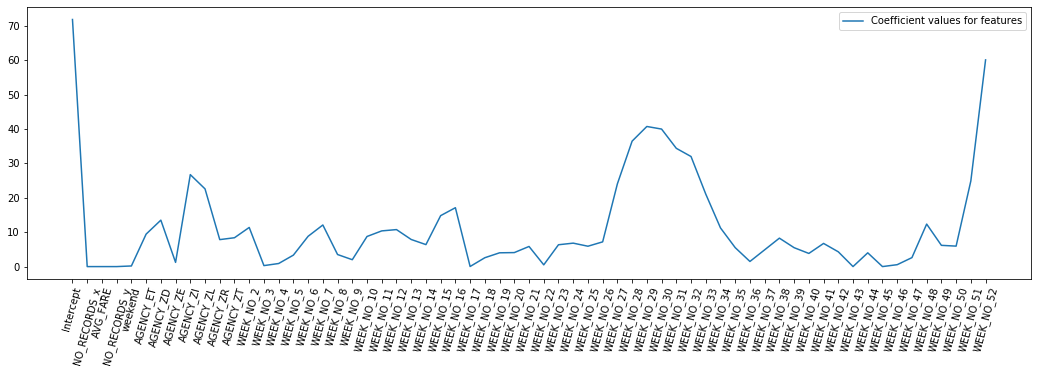

In [110]:
fig = plt.figure(figsize=(18,5))
plt.plot(result_param)
plt.xticks(rotation = 75)
plt.legend(["Coefficient values for features"])
plt.show()

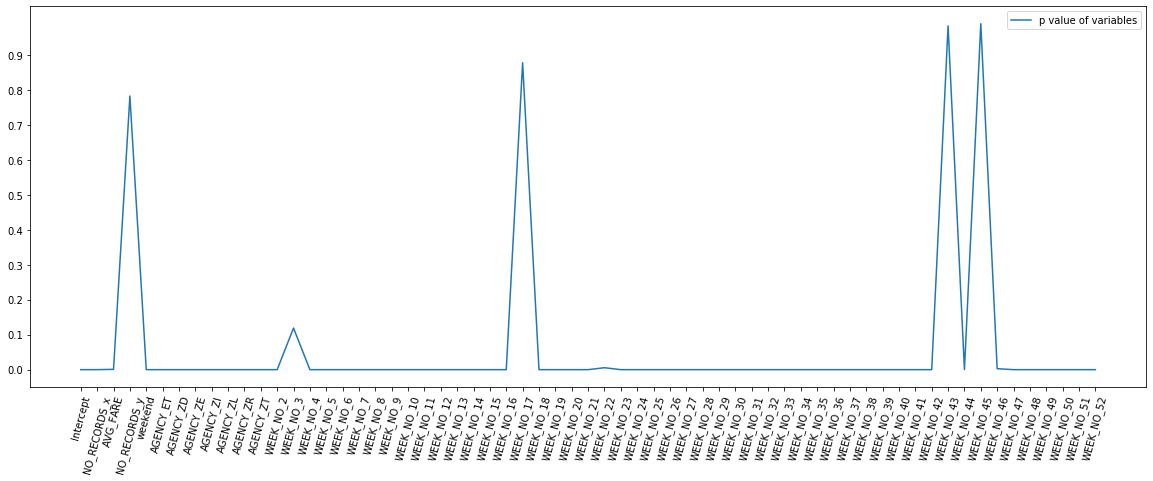

In [90]:
fig = plt.figure(figsize = (20,7))

#axes = fig.add_axes([0.1, 0.01, 0.5 ,0.8])
#plt.scatter(reg_ols.pvalues.index , reg_ols.pvalues)
plt.plot(reg_ols.pvalues)
plt.xticks(rotation = 75)
plt.yticks(np.arange(0, 1,0.1))
plt.legend(["p value of variables"])
plt.show()

(array([58.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  2.]),
 array([0.        , 0.0989219 , 0.19784379, 0.29676569, 0.39568758,
        0.49460948, 0.59353138, 0.69245327, 0.79137517, 0.89029706,
        0.98921896]),
 <a list of 10 Patch objects>)

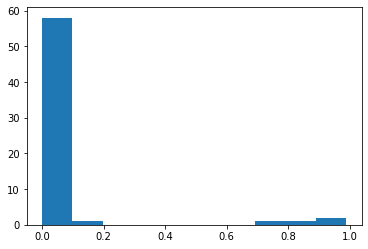

In [28]:
plt.hist(reg_ols.pvalues)

In [29]:
reg_ols.pvalues[reg_ols.pvalues>0.05]

NO_RECORDS_y    0.782434
WEEK_NO_3       0.118881
WEEK_NO_17      0.877551
WEEK_NO_43      0.983073
WEEK_NO_45      0.989219
dtype: float64

In [30]:
#NO_RECORDS_y    0.418647 -
#CXR_HA          0.520692 -
#WEEK_NO_3       0.064827 - Jan 14- Jan 28
#WEEK_NO_17      0.898010 - Apr 22 - Apr 28
#WEEK_NO_43      0.998704 - Oct 21 - Oct 27
#WEEK_NO_45      0.94534  - Nov 4 - NOv 10

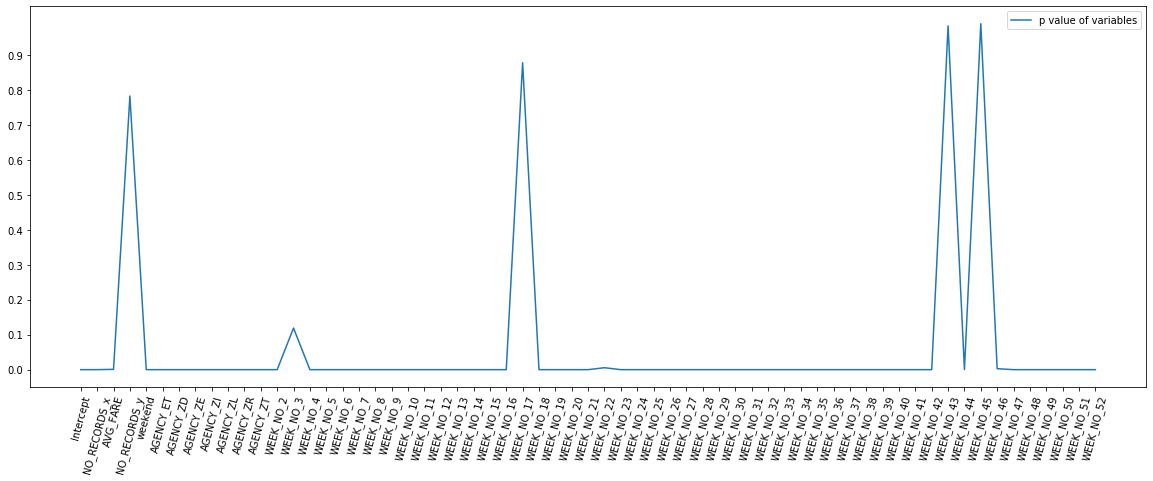

In [31]:
fig = plt.figure(figsize = (20,7))

#axes = fig.add_axes([0.1, 0.01, 0.5 ,0.8])
#plt.scatter(reg_ols.pvalues.index , reg_ols.pvalues)
plt.plot(reg_ols.pvalues)
plt.xticks(rotation = 75)
plt.yticks(np.arange(0, 1,0.1))
plt.legend(["p value of variables"])
plt.show()

In [32]:
y_pred = reg_ols.predict(merged_regression.iloc[: , :-1])

In [33]:
y_pred.shape

(163416,)

In [34]:
merged_regression['y_pred'] = [ yhat for yhat in y_pred]
merged_regression.iloc[:5,-2:]

,AVG_DAILY_FARE,y_pred
0,82.560914,77.739918
1,82.560914,77.692658
2,82.560914,77.744252
3,82.560914,77.765434
4,82.560914,77.744437


In [35]:
merged_regression.iloc[2 , 11:]

WEEK_NO_2          0.000000
WEEK_NO_3          0.000000
WEEK_NO_4          0.000000
WEEK_NO_5          0.000000
WEEK_NO_6          0.000000
WEEK_NO_7          0.000000
WEEK_NO_8          0.000000
WEEK_NO_9          0.000000
WEEK_NO_10         0.000000
WEEK_NO_11         0.000000
WEEK_NO_12         0.000000
WEEK_NO_13         0.000000
WEEK_NO_14         0.000000
WEEK_NO_15         0.000000
WEEK_NO_16         0.000000
WEEK_NO_17         0.000000
WEEK_NO_18         0.000000
WEEK_NO_19         0.000000
WEEK_NO_20         0.000000
WEEK_NO_21         0.000000
WEEK_NO_22         0.000000
WEEK_NO_23         0.000000
WEEK_NO_24         0.000000
WEEK_NO_25         0.000000
WEEK_NO_26         0.000000
WEEK_NO_27         0.000000
WEEK_NO_28         0.000000
WEEK_NO_29         0.000000
WEEK_NO_30         0.000000
WEEK_NO_31         0.000000
WEEK_NO_32         0.000000
WEEK_NO_33         0.000000
WEEK_NO_34         0.000000
WEEK_NO_35         0.000000
WEEK_NO_36         0.000000
WEEK_NO_37         0

In [39]:
merged_regression.shape

(163416, 65)

In [47]:
#merged_regression.iloc[10000 , 11:-3]

In [51]:
merged_regression['decode_week'] = 0
#merged_regression.shape[0]
for i in range(1000):
    merged_regression.iloc[i,-1] = decode(merged_regression.iloc[i , 11:-3])

WEEK_NO_2          0.000000
WEEK_NO_3          1.000000
WEEK_NO_4          0.000000
WEEK_NO_5          0.000000
WEEK_NO_6          0.000000
WEEK_NO_7          0.000000
WEEK_NO_8          0.000000
WEEK_NO_9          0.000000
WEEK_NO_10         0.000000
WEEK_NO_11         0.000000
WEEK_NO_12         0.000000
WEEK_NO_13         0.000000
WEEK_NO_14         0.000000
WEEK_NO_15         0.000000
WEEK_NO_16         0.000000
WEEK_NO_17         0.000000
WEEK_NO_18         0.000000
WEEK_NO_19         0.000000
WEEK_NO_20         0.000000
WEEK_NO_21         0.000000
WEEK_NO_22         0.000000
WEEK_NO_23         0.000000
WEEK_NO_24         0.000000
WEEK_NO_25         0.000000
WEEK_NO_26         0.000000
WEEK_NO_27         0.000000
WEEK_NO_28         0.000000
WEEK_NO_29         0.000000
WEEK_NO_30         0.000000
WEEK_NO_31         0.000000
WEEK_NO_32         0.000000
WEEK_NO_33         0.000000
WEEK_NO_34         0.000000
WEEK_NO_35         0.000000
WEEK_NO_36         0.000000
WEEK_NO_37         0

In [52]:
merged_regression.iloc[999, -1]

3

In [53]:
for i in range(1000,50000,1):
    merged_regression.iloc[i,-1] = decode(merged_regression.iloc[i , 11:-3])
merged_regression.iloc[9999,-1]

E:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


25

In [54]:
for i in range(50000,100000,1):
    merged_regression.iloc[i,-1] = decode(merged_regression.iloc[i , 11:-3])
merged_regression.iloc[99999,-1]

47

In [55]:
for i in range(100000,merged_regression.shape[0],1):
    merged_regression.iloc[i,-1] = decode(merged_regression.iloc[i , 11:-3])
merged_regression.iloc[-1,-1]

52

In [56]:
result_merged_reg = merged_regression.copy()

In [58]:
result_merged_reg.drop(columns = result_merged_reg.columns[11:-3], inplace=True)
result_merged_reg.columns

Index(['NO_RECORDS_x', 'AVG_FARE', 'NO_RECORDS_y', 'weekend', 'AGENCY_ET',
       'AGENCY_ZD', 'AGENCY_ZE', 'AGENCY_ZI', 'AGENCY_ZL', 'AGENCY_ZR',
       'AGENCY_ZT', 'AVG_DAILY_FARE', 'y_pred', 'decode_week'],
      dtype='object')

In [78]:
result_merged_reg.groupby(by = ["decode_week"])["y_pred"].min()

decode_week
1      65.958726
2      54.709827
3      65.511290
4      66.508968
5      68.453016
6      73.806032
7      77.478905
8      69.127938
9      67.681843
10     74.332321
11     76.012990
12     75.956948
13     73.342051
14     71.973530
15     80.360129
16     82.905539
17     67.246593
18     69.667641
19     71.057719
20     71.024485
21     72.642013
22     66.386646
23     73.290434
24     73.874297
25     73.265419
26     74.530538
27     91.420260
28    104.380228
29    108.595942
30    107.590116
31    102.490121
32    100.525511
33     89.243339
34     79.352909
35     73.755564
36     66.140558
37     72.270937
38     75.449047
39     72.516068
40     70.850922
41     74.087883
42     71.601755
43     67.604545
44     63.780825
45     67.877333
46     66.543471
47     69.807083
48     79.475913
49     60.924028
50     61.133777
51     91.803440
52    126.156685
Name: y_pred, dtype: float64

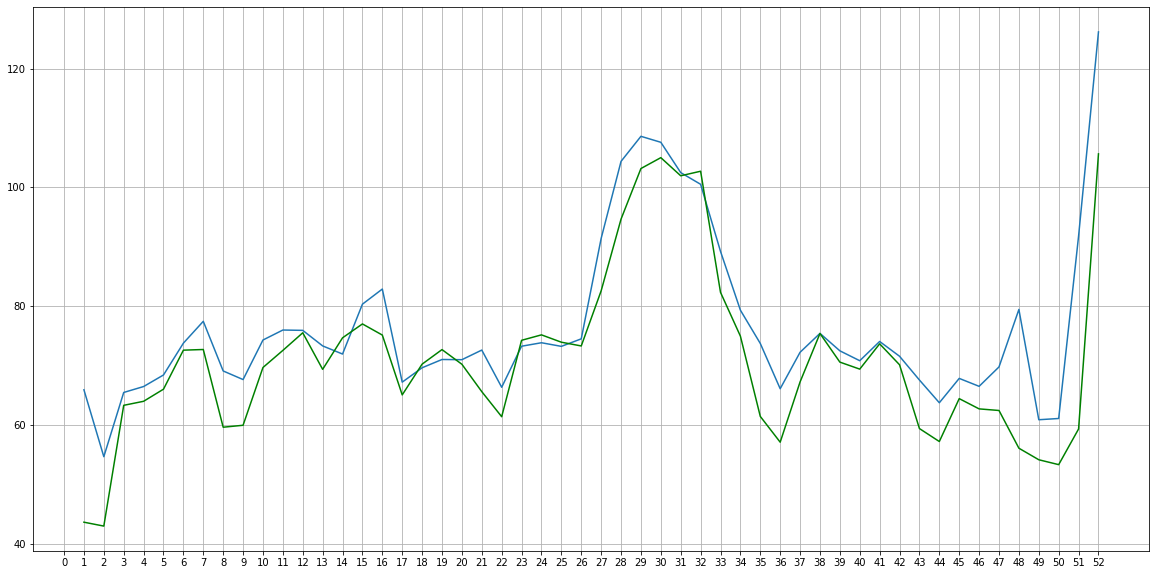

In [102]:
plt.figure(figsize = (20,10))
plt.plot(result_merged_reg.groupby(by = ["decode_week"])["y_pred"].min())
plt.plot(result_merged_reg.groupby(by = ["decode_week"])["AVG_DAILY_FARE"].min(), color="green")
plt.xticks(range(53))
plt.grid()
#plt.plot( y=result_merged_reg['AVG_DAILY_FARE'])
#plt.plot(merged_regression['y_pred'].rolling(window = 30) , color = 'red')
plt.show()

In [67]:
#withWeekIndex = pd.merge(y_test, y_pred,  how='left', left_on=index, right_on = index)
#y_test['y_pred']= [pred for pred in y_pred]
#y_test[:10]

110358    106.579
131008    84.8384
1197      88.0288
40141     78.4202
111999    104.288
52197     141.037
130565    74.0824
139258    73.6912
85003     93.8324
146180    76.2827
Name: AVG_DAILY_FARE, dtype: object

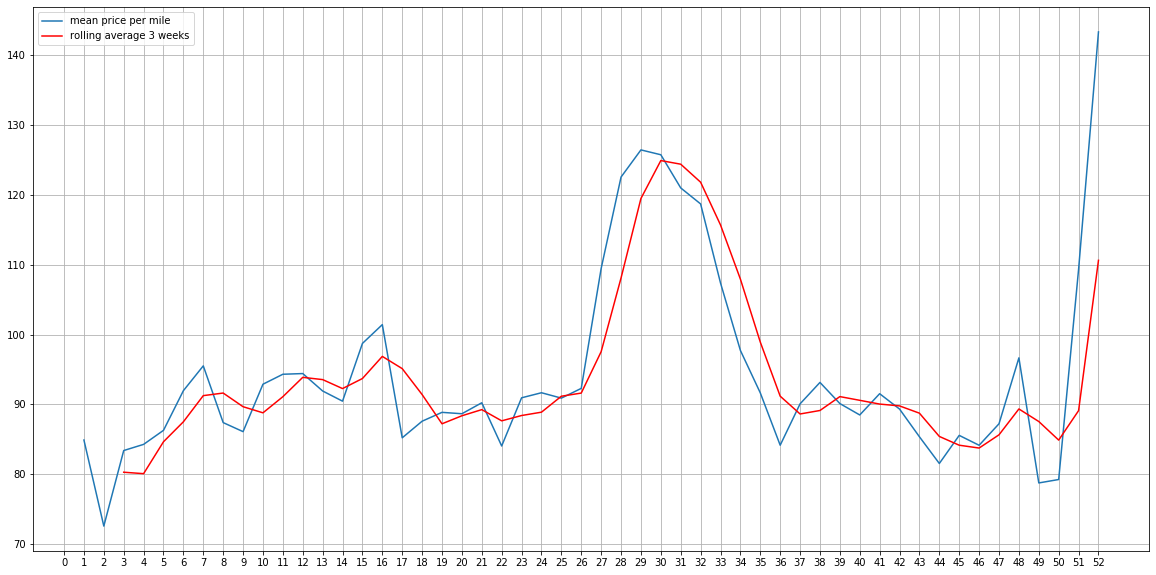

In [32]:
plt.figure(figsize=(20,10))
plt.plot(merged.groupby(by = ["WEEK_NO"])["AVG(DAILY_FARE)"].mean())
plt.plot(merged.groupby(by = ["WEEK_NO"])["AVG(DAILY_FARE)"].mean().rolling(window=3).mean(), 'k-', color="red")
plt.xticks(range(0,53))
plt.grid()
plt.legend(["mean price per mile", "rolling average 3 weeks"])
plt.show()

In [33]:
print("Complete data",merged_regression.shape)
X = merged_regression.iloc[:, :-1]
print("X features" , X.shape)
y = merged_regression["AVG_FARE"]
print( "Y label" , y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Complete data (163416, 63)
X features (163416, 62)
Y label (163416,)


### Code below not used. Just for ref

In [34]:


reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train RMSE error", sqrt(mean_squared_error(y_train, reg.predict(X_train))))
print("Test RMSE error", sqrt(mean_squared_error(y_test, reg.predict(X_test))))
print("Coefficients")
print("Intercept" , reg.intercept_)
for x, y in zip(X_train.columns.tolist(), reg.coef_):
    print(x,round(y,2))

Train RMSE error 5.267460488214983e-13
Test RMSE error 5.021237978170914e-13
Coefficients
Intercept 3.410605131648481e-13
NO_RECORDS_x 0.0
AVG_FARE 1.0
NO_RECORDS_y -0.0
weekend -0.0
AGENCY_ET -0.0
AGENCY_ZD -0.0
AGENCY_ZE -0.0
AGENCY_ZI -0.0
AGENCY_ZL 0.0
AGENCY_ZR 0.0
AGENCY_ZT 0.0
WEEK_NO_2 -0.0
WEEK_NO_3 -0.0
WEEK_NO_4 -0.0
WEEK_NO_5 -0.0
WEEK_NO_6 -0.0
WEEK_NO_7 -0.0
WEEK_NO_8 -0.0
WEEK_NO_9 -0.0
WEEK_NO_10 -0.0
WEEK_NO_11 -0.0
WEEK_NO_12 -0.0
WEEK_NO_13 -0.0
WEEK_NO_14 -0.0
WEEK_NO_15 -0.0
WEEK_NO_16 -0.0
WEEK_NO_17 -0.0
WEEK_NO_18 -0.0
WEEK_NO_19 -0.0
WEEK_NO_20 -0.0
WEEK_NO_21 -0.0
WEEK_NO_22 -0.0
WEEK_NO_23 -0.0
WEEK_NO_24 -0.0
WEEK_NO_25 -0.0
WEEK_NO_26 -0.0
WEEK_NO_27 -0.0
WEEK_NO_28 -0.0
WEEK_NO_29 -0.0
WEEK_NO_30 -0.0
WEEK_NO_31 -0.0
WEEK_NO_32 -0.0
WEEK_NO_33 -0.0
WEEK_NO_34 -0.0
WEEK_NO_35 -0.0
WEEK_NO_36 -0.0
WEEK_NO_37 -0.0
WEEK_NO_38 -0.0
WEEK_NO_39 -0.0
WEEK_NO_40 -0.0
WEEK_NO_41 -0.0
WEEK_NO_42 -0.0
WEEK_NO_43 -0.0
WEEK_NO_44 -0.0
WEEK_NO_45 -0.0
WEEK_NO_46 -0.0
WEE

In [35]:
clf = linear_model.Lasso()
clf.fit(X_train, y_train)
print("Train RMSE error", sqrt(mean_squared_error(y_train, clf.predict(X_train))))
print("Test RMSE error", sqrt(mean_squared_error(y_test, clf.predict(X_test))))
print("Coefficients")
for x, y in zip(X_train.columns.tolist(), clf.coef_):
    print(x,round(y,2))

Train RMSE error 0.002944004467616567
Test RMSE error 0.002815725983464009
Coefficients
NO_RECORDS_x -0.0
AVG_FARE 1.0
NO_RECORDS_y 0.0
weekend 0.0
AGENCY_ET 0.0
AGENCY_ZD -0.0
AGENCY_ZE 0.0
AGENCY_ZI -0.0
AGENCY_ZL -0.0
AGENCY_ZR -0.0
AGENCY_ZT -0.0
WEEK_NO_2 -0.0
WEEK_NO_3 -0.0
WEEK_NO_4 -0.0
WEEK_NO_5 -0.0
WEEK_NO_6 -0.0
WEEK_NO_7 -0.0
WEEK_NO_8 -0.0
WEEK_NO_9 -0.0
WEEK_NO_10 0.0
WEEK_NO_11 0.0
WEEK_NO_12 0.0
WEEK_NO_13 0.0
WEEK_NO_14 0.0
WEEK_NO_15 0.0
WEEK_NO_16 0.0
WEEK_NO_17 0.0
WEEK_NO_18 -0.0
WEEK_NO_19 -0.0
WEEK_NO_20 -0.0
WEEK_NO_21 -0.0
WEEK_NO_22 -0.0
WEEK_NO_23 -0.0
WEEK_NO_24 -0.0
WEEK_NO_25 0.0
WEEK_NO_26 0.0
WEEK_NO_27 0.0
WEEK_NO_28 0.0
WEEK_NO_29 0.0
WEEK_NO_30 0.0
WEEK_NO_31 0.0
WEEK_NO_32 0.0
WEEK_NO_33 0.0
WEEK_NO_34 0.0
WEEK_NO_35 0.0
WEEK_NO_36 0.0
WEEK_NO_37 -0.0
WEEK_NO_38 -0.0
WEEK_NO_39 -0.0
WEEK_NO_40 -0.0
WEEK_NO_41 -0.0
WEEK_NO_42 -0.0
WEEK_NO_43 -0.0
WEEK_NO_44 -0.0
WEEK_NO_45 -0.0
WEEK_NO_46 -0.0
WEEK_NO_47 -0.0
WEEK_NO_48 0.0
WEEK_NO_49 -0.0
WEEK_NO_50